<a href="https://colab.research.google.com/github/cristobalperezp/Data-Science-training/blob/main/Laboratorio_3_IN6531.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1>Laboratorio N°3</center></h1>

<center><strong>IN6531: Introducción a la Minería de Datos - Primavera 2021</strong></center>

##Presentación

###Cuerpo Docente:

- Profesor: Richard Weber
- Auxiliar: Patricio Ortiz
- Ayudantes: Felipe Arias, Walter Guzman, Esteban Rojas

###Declaración de compromiso ético

Nosotros **Paola Rojas, Exequiel Padilla y Cristóbal Pérez** declaramos que realizamos de manera grupal los pasos de la presente actividad. También declaramos no incurrir en copia, ni compartir nuestras respuestas con otras personas ni con otros grupos. Por lo que, ratificamos que las respuestas son de nuestra propia confección y reflejan nuestro propio conocimiento.

### Reglas:

- Fecha de entrega: 4 días desde la publicación, 3 días de atraso con 1 punto de descuento c/u. Pueden utilizar días bonus sin descuento.
- **Grupos de máximo 3 personas**.
- Para trabajar este laboratorio edite este documento `.ipynb` agregando sus respuestas donde corresponda.
- Para cada pregunta, cuando corresponda, incluya el código fuente que utilizó para llegar a su respuesta.
- El formato de entrega para esta actividad debe ser un archivo `.ipynb` el cual debe ser subido a U-Cursos. Basta con que uno de los integrantes haga la entrega. Si más integrantes hacen una entrega en U-Cursos, se revisará cualquiera de éstas.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. En caso de sospecha de copia se activaran los protocolos correspondientes.
- Pueden usar cualquer material del curso que estimen conveniente.






### Objetivos del lab: 

- Demostrar suficiencia de conocimientos teoricos respecto a clustering.
- Aplicar modelo K-means.
- Aplicar modelos de clustering jerarquico.
- Mostrar manejo de habilidades frente a un "caso real"

##Preguntas teoricas (1.0 Puntos)

Cada pregunta "pesa" lo mismo en la asignación de nota, es decir, 2 décimas. Al final hay una pregunta bonus, esta sólo aplica sobre el puntaje de esta sección, i.e. si en esta sección tienen puntaje perfecto, el puntaje del bonus no se suma al puntaje de las preguntas prácticas.

P1.- ¿Cual es la diferencia entre un modelo supervisado y un modelo no-supervisado?

**Respuesta:**
La principal diferencia entre un modelo supervisado y no-supervisado es que, en el primero de ellos (*supervisado*) el data scientist actúa como  guía para enseñar al algoritmo las conclusiones a las que debe arrivar. Es decir, la salida del algoritmo (variable dependiente) ya es conocida. Por otro lado, en un modelo con aprendizaje no-supervisado, la salida del algoritmo no es conocida (no existe variable dependiente). En otras palabras, un modelo no-supervisado está centrado en el supuesto de que un computador puede aprender a identificar procesos y patrones complejos sin intervención humana para proporcionar orientación.



P2.- ¿Cuales son los objetivos que persigue el clustering?

**Respuesta:**
Según lo revisado en clase, los objetivos que persigue un clustering son:


1.   Reducir complejidad de una base de datos
2.   Encontrar patrones en la data a analizar
3.   Agrupar objetos similares




P3.- Explique, en sus palabras, el funcionamiento de los algoritmos aglomerativos.

**Respuesta:** En el contexto de clustering, un algoritmo aglomerativo comienza asignando un cluster por cada observación de la base de datos. Luego, va agrupando datos de acuerdo a alguna métrica establecida, uniendo los datos más cercanos. Una vez se van creando estos clusters, se sigue con el procedimiento, tomando distancias de los clusters actuales hacia las observaciones, hasta que finalmente se llega al cluster que contiene a todas las observaciones. El experto debe decidir con cuantos cluster quedarse de acuerdo al problema que quiere resolver.



P4.- Describa una ventaja y desventaja de los siguientes métodos de clustering:
* K-Means
* Clustering Jerarquico Aglomerativo

**Respuesta:** 
En primer lugar, con respeto al K-Means, las principal ventajas con las que cuenta este método son:

*   Complejidad de tiempo relativamente baja
*   Alta eficiencia informática

Por otro lado, sus pricipales deventajas son:

*   No apto para datos no convexos
*   Áltamente sensible a los outliers

En segundo lugar, con respeto al clustering jerárquico, encontramos que las principal ventajas son:

*   Adecuado para conjunto de datos con forma arbitraria
*   Alta escalabilidad

Por otro lado, sus pricipales deventajas son:

*   Relativa alta complejidad en tiempo
*   El número de cluster tiene que ser predeterminado

*P5*.- Explique el funcionamiento del "método del codo". 

**Respuesta:** El método del codo utiliza la distancia media de las observaciones a su centroide. Cuanto menor es la distancia intra-cluster mejor, ya que significa que los clústers son más compactos. El método del codo busca el k que satisfaga que un incremento de este, no mejore sustancialmente la distancia media intra-cluster, que se visualiza gráficamente (WSS(k) vs k) en un punto en que el cambio dde pendiente se mantenga "estable".

##Preguntas prácticas (5.0 Puntos)



###Problema "dirigido" (3.0 Puntos)

Para esta parte usaremos el dataset de cantidad de denuncias por 100 mil habitantes por tipo de delito desde el año 2001 al 2016 en Chile (Fuente: http://www.seguridadpublica.gov.cl/estadisticas/tasa-de-denuncias-y-detenciones/delitos-de-mayor-connotacion-social-series-de-datos-2001-2017/).

Ejecute el siguiete código para cargar el dataset:

In [ ]:
import pandas as pd
import numpy as np

dataframe = pd.read_csv("https://users.dcc.uchile.cl/~hsarmien/mineria/datasets/denuncias-2001-2016.txt", sep=" ")
dataframe.head(4)

,comuna,anio,homicidios,hurtos,robo_lugar,robo_sorpresa,robo_vehiculo,robo_violencia,violacion
1,Arica,2001,1.6,370.3,NaN,9.5,NaN,107.2,16.4
2,Arica,2002,1.1,346.7,NaN,34.0,NaN,122.8,14.9
3,Arica,2003,1.6,460.1,464.4,52.8,172.2,196.2,15.5
4,Arica,2004,1.1,452.2,395.0,64.1,203.7,143.8,13.9


Se desea utilizar los datos del año 2006. A continuación ejecute una celda de código en la cual se filtre según esta fecha. Posteriormente elimine las columnas `anio` y `comuna`. Finalmente asigne el resultado a una variable llamada `X`

<font size="-1"><b>Puntaje: 0.1 Puntos</b></font> 

In [ ]:
# Filtrar para obtener observaciones correspondientes al 2006
df = dataframe[dataframe["anio"] == 2006]
df.head(4)

,comuna,anio,homicidios,hurtos,robo_lugar,robo_sorpresa,robo_vehiculo,robo_violencia,violacion
6,Arica,2006,1.1,507.5,320.3,60.9,89.0,161.2,8.6
22,Camarones,2006,0.0,68.0,0.0,0.0,0.0,0.0,0.0
38,Putre,2006,0.0,834.9,256.9,0.0,0.0,0.0,64.2
54,General Lagos,2006,0.0,81.2,81.2,0.0,0.0,0.0,0.0


In [ ]:
# Eliminar las columnas "anio" y "comuna"
df = df.drop(columns=["anio","comuna"])
X = df
X.head(4)

,homicidios,hurtos,robo_lugar,robo_sorpresa,robo_vehiculo,robo_violencia,violacion
6,1.1,507.5,320.3,60.9,89.0,161.2,8.6
22,0.0,68.0,0.0,0.0,0.0,0.0,0.0
38,0.0,834.9,256.9,0.0,0.0,0.0,64.2
54,0.0,81.2,81.2,0.0,0.0,0.0,0.0


**Respuesta esperada**

In [ ]:
X

,homicidios,hurtos,robo_lugar,robo_sorpresa,robo_vehiculo,robo_violencia,violacion
6,1.1,507.5,320.3,60.9,89.0,161.2,8.6
22,0.0,68.0,0.0,0.0,0.0,0.0,0.0
38,0.0,834.9,256.9,0.0,0.0,0.0,64.2
54,0.0,81.2,81.2,0.0,0.0,0.0,0.0
70,0.6,680.3,327.2,211.5,169.7,287.0,18.2
...,...,...,...,...,...,...,...
5462,2.8,359.0,451.3,44.0,27.0,293.8,5.7
5478,3.4,233.4,375.4,27.1,6.8,60.9,6.8
5494,3.4,332.7,492.3,23.8,20.4,71.3,3.4
5510,0.0,263.6,529.3,57.1,22.0,235.0,11.0


#### K-Means (1.4 Puntos)

1. Cuando usamos K-Means debemos definir previamente el número de clusters que queremos generar. Teniendo en cuenta estos datos, implemente un método que nos permita determinar cuántos clusters usar.
<font size="-1"><b>Puntaje: 0.5 Puntos</b></font> 

- Se recomienda "customizar" el gráfico para que "se vea mas grande".

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt #pueden usar plotly si así lo desean.

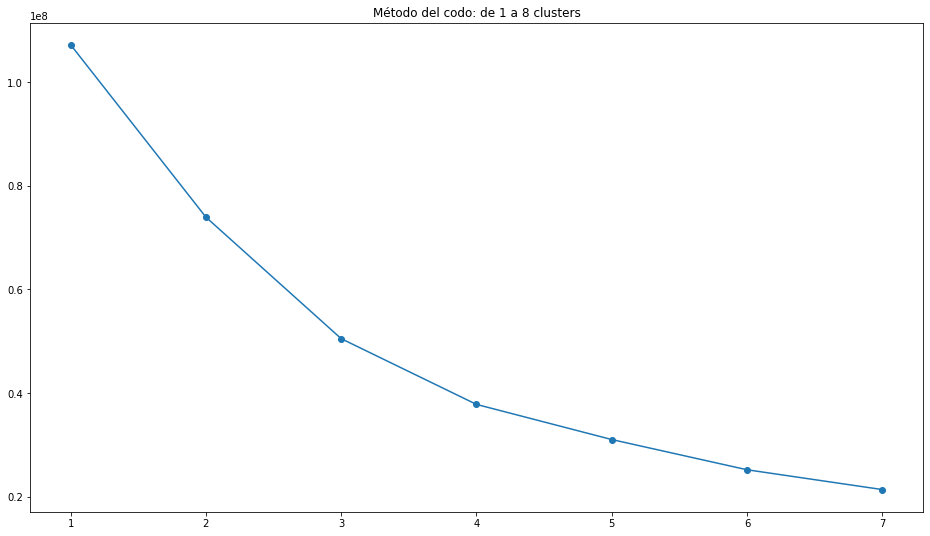

In [ ]:
# Método N°1: Empleando "the elbow criterion"
sse = []

a=1
b=8

clusters = list(range(a,b))
for i in clusters:
  kmeans = KMeans(n_clusters = i, n_init=30, max_iter=400, random_state=20)
  kmeans.fit(X)
  sse.append(kmeans.inertia_)

plt.figure(figsize=(16,9))
plt.plot(clusters, sse, marker="o" )
plt.title(f"Método del codo: de {a} a {b} clusters")
plt.show()

2. ¿Cuántos clusters propone usar para este dataset? Justifique su elección. <font size="-1"><b>Puntaje: 0.3 Puntos</b></font> 

**Respuesta:** Tomando en consideración los resultados del "*elbow criterion*", se propone usar 4 clusters para este dataset. En cuanto al gráfico, se puede observar que en el cuarto cluster (4°) existe un cambio considerable en la pendiente de la recta. En ese sentido, las ganancias en términos de SSE por un cluster adicional (5° cluster) es menor en comparación al cluster anterior (4° cluster).



3. Entrene un modelo de K-Means usando el número de clusters que eligió en la pregunta anterior e imprima las asignaciones de clusters para cada dato.
<font size="-1"><b>Puntaje: 0.2 Puntos</b></font> 

In [ ]:
# Clustering por medio del modelo K-Means
Kmeans = KMeans(n_clusters=4, n_init=30, max_iter=300, random_state=20)
Kmeans.fit(X)

y_predict=Kmeans.predict(X)
y_predict

array([0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 3, 3, 3,
       0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       3, 0, 3, 0, 0, 3, 3, 3, 3, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0,
       3, 1, 1, 1, 1, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 0, 3, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0,
       0, 0, 0, 0, 3, 3, 3, 0, 3, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 3, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 3, 0, 3, 3,

4. Ejecute el siguiente código que bajará la dimensionalidad de los datos de 7 a 2. Grafique los datos transformados y pinte los gráficos para tener una representación visual de los clusters. <font size="-1"><b>Puntaje: 0.4 Puntos</b></font> 

In [ ]:
from sklearn.decomposition import PCA
new_X = PCA(n_components=2, random_state=0).fit_transform(X)

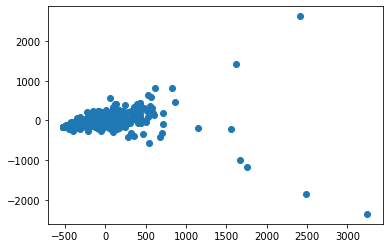

In [ ]:
plt.scatter(new_X[:, 0], new_X[:, 1])

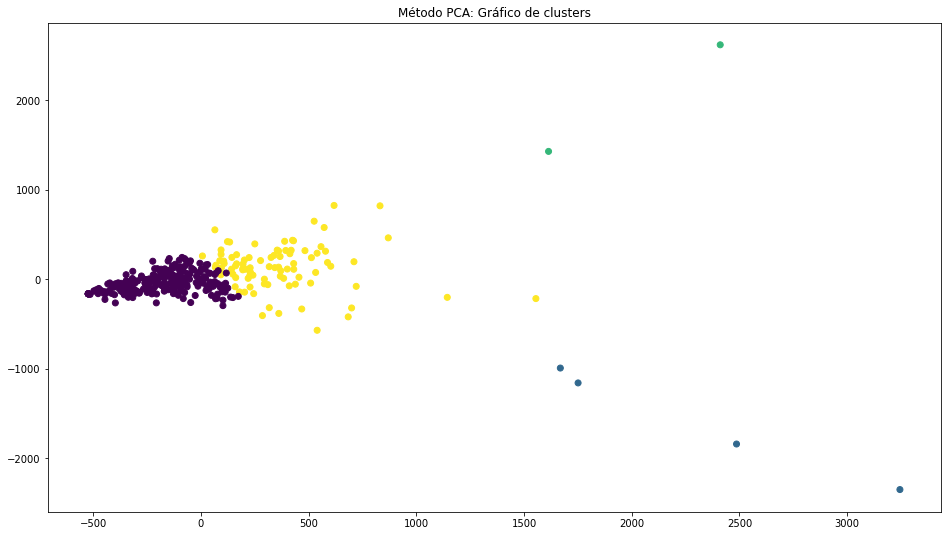

In [ ]:
# Método N°1:
# Grafique los datos transformados y pinte los gráficos para tener una representación visual de los clusters
plt.figure(figsize=(16,9))
plt.scatter(new_X[:, 0], new_X[:, 1],c=y_predict)
plt.title("Método PCA: Gráfico de clusters")
plt.show()


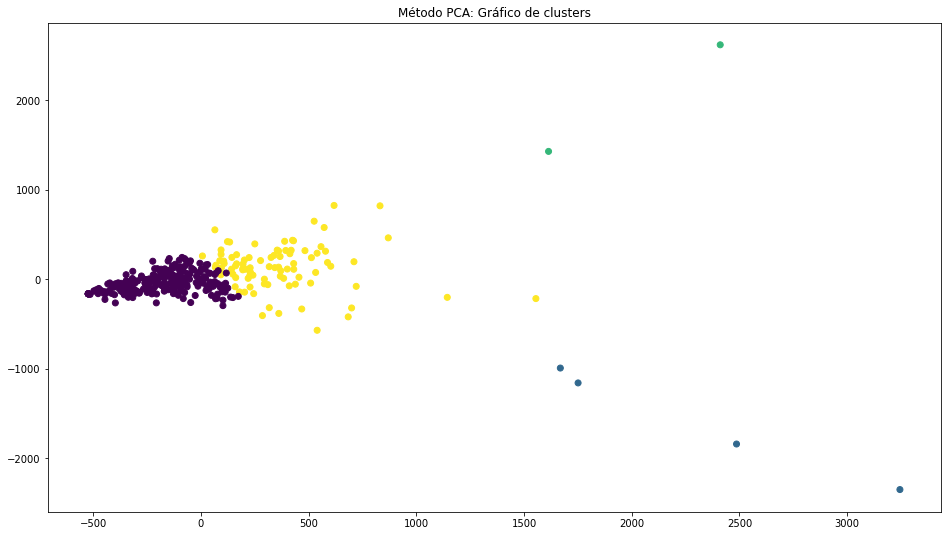

In [ ]:
# Método N°2:
# Grafique los datos transformados y pinte los gráficos para tener una representación visual de los clusters
plt.figure(figsize=(16,9))
plt.scatter(new_X[:, 0], new_X[:, 1], c= Kmeans.labels_ )
plt.title("Método PCA: Gráfico de clusters")
plt.show()

#### Clustering Jerárquico Aglomerativo (1.5 Puntos)

1. Usando los datos anteriores, ejecute cada uno de los 4 métodos de clustering jerárquico: complete, single, average y ward, y visualice los dendrogramas formados. Adjunte el código necesario. No necesita generar los 4 dendrogramas en el mismo gráfico, pueden ser distintos.
<font size="-1"><b>Puntaje: 0.2 Puntos</b></font> 

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# Estableciendo los 04 métodos de clustering jerárquico:
complete = linkage(X, method="complete", metric="euclidean", optimal_ordering=False)
single = linkage(X, method="single", metric="euclidean", optimal_ordering=False)
average = linkage(X, method="average", metric="euclidean", optimal_ordering=False)
ward = linkage(X, method="ward", metric="euclidean", optimal_ordering= False)

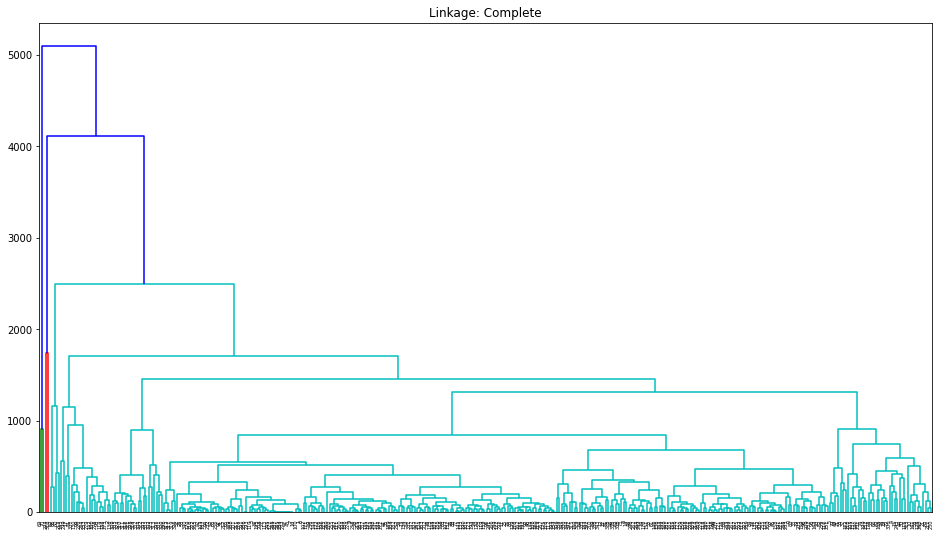

In [ ]:
# Método N°1: Complete
plt.figure(figsize=(16,9))
dendrogram(complete)
plt.title("Linkage: Complete")
plt.show()

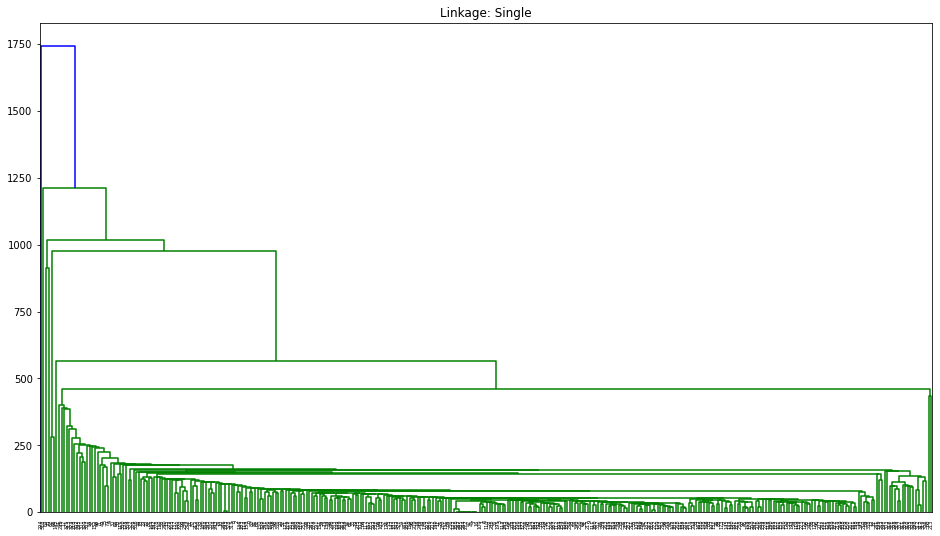

In [ ]:
# Método N°2: Single
plt.figure(figsize=(16,9))
dendrogram(single)
plt.title("Linkage: Single")
plt.show()

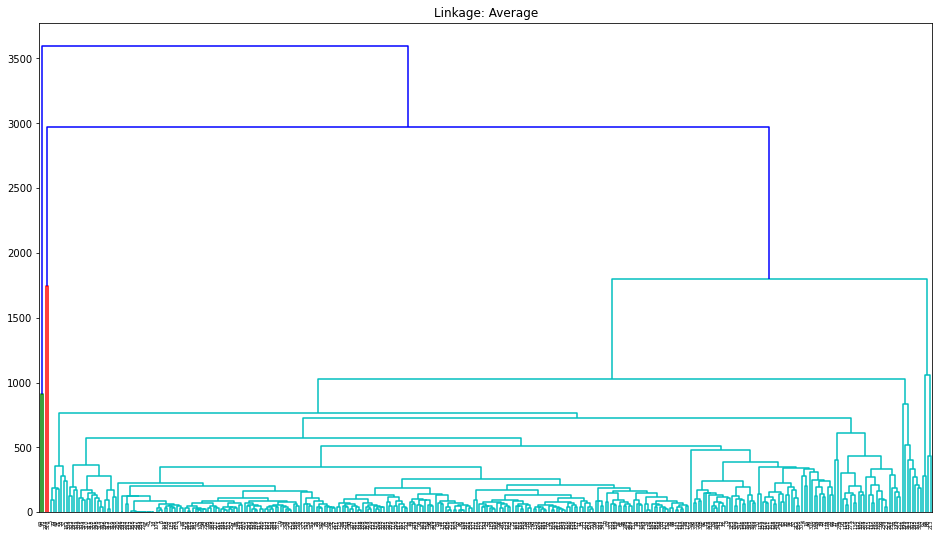

In [ ]:
# Método N°3: Average
plt.figure(figsize=(16,9))
dendrogram(average)
plt.title("Linkage: Average")
plt.show()

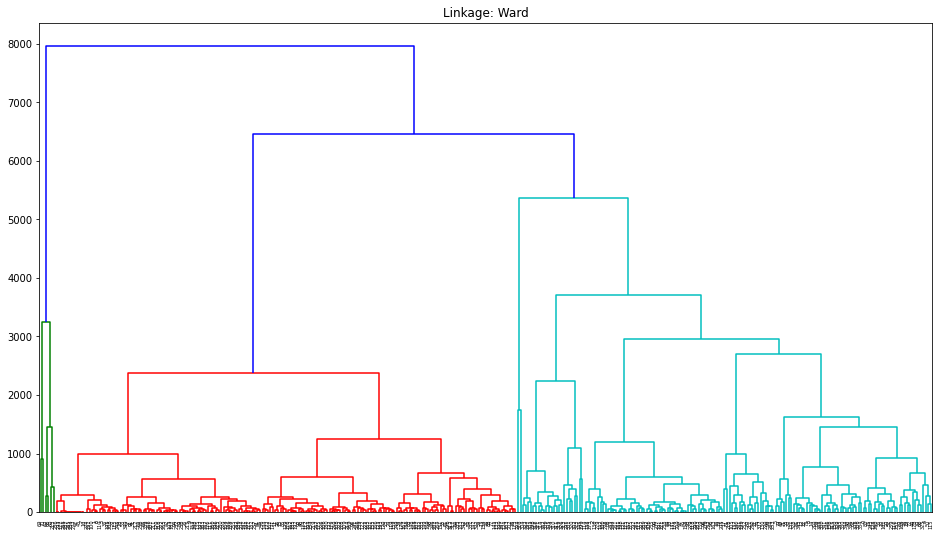

In [ ]:
# Método N°4: Ward
plt.figure(figsize=(16,9))
dendrogram(ward)
plt.title("Linkage: Ward")
plt.show()

2. Fijándose en el método `single`, a qué altura recomendaría cortar el árbol? <font size="-1"><b>Puntaje: 0.2 Puntos</b></font> 

**Respuesta:**
Tomando en consideración el dendrograma del método single, recomendaríamos cortar el árbol en **y=1000**. Al realizar ese corte, encontraríamos cuatro (04) clusters, lo cual consideramos bastante razonable. 


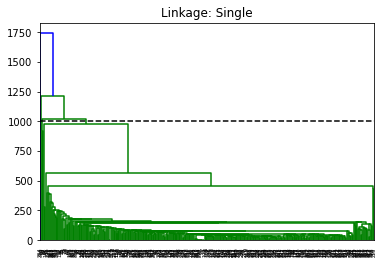

In [ ]:
# Método Single: Dendrograma con corte en y=1000
#plt.figure(figsize=(16,9))
dendrogram(single)
plt.title("Linkage: Single")
plt.axhline(y=1000, color="black", linestyle="--")
plt.show()

3. Ahora si miramos el método `ward`, cuántos clusters propone usar? A qué altura se debe cortar el arbol para obtener esa cantidad de clusters? <font size="-1"><b>Puntaje: 0.2 Puntos</b></font> 

**Respuesta:** Tomando en consideración el método ward, proponemos usar cuatro (04) clusters. Para ello, el árbol debe ser cortado en **y=5000**. Asimismo, es importante notar que cualquier corte en el rango **y=[3800, 5300]** genera cuatro (04) clusters.  

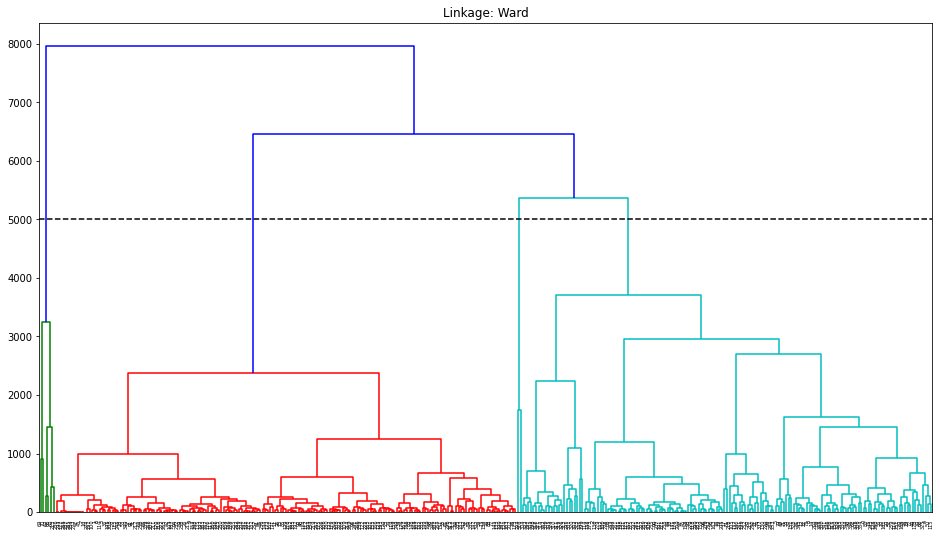

In [ ]:
plt.figure(figsize=(16,9))
dendrogram(ward)
plt.title("Linkage: Ward")
plt.axhline(y=5000, color="black", linestyle="--")
plt.show()

4. Implemente el código para asignar clusters a los datos siguiendo lo que usted propuso en la pregunta **2.** y **3.** y liste la asignación de clusters para cada punto del dataset para `single` y `ward`. Cuántos clusters se generan para el método `single` cortando a la altura que propuso en la pregunta **2.**? <font size="-1"><b>Puntaje: 0.4 Puntos</b></font> 

In [ ]:
# Método Single:
AC_single = AgglomerativeClustering(n_clusters=None, affinity='euclidean', compute_full_tree='auto', linkage='single', distance_threshold=1000)
AC_single.fit(X)
AC_single.n_clusters_

4

En la pregunta 2, para el método *single*, se propuso un corte en *y=1000*, lo cual propició la creación de cuatro (04) clusters.

In [ ]:
# Método Single:
AC_single.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,

In [ ]:
# Método Ward:
AC_ward = AgglomerativeClustering(n_clusters=4, affinity='euclidean', compute_full_tree='auto', linkage='ward', distance_threshold=None)
AC_ward.fit(X)
AC_ward.n_clusters_

4

In [ ]:
# Método Ward:
AC_ward.labels_

array([0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 1, 2, 0, 2, 2, 2,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0,
       2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 1, 2, 2, 2, 2, 0, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2,
       2, 2, 2, 0, 0, 2, 0, 2, 3, 0, 2, 0, 0, 0, 0,

5. Cuántos datos quedan asignados a cada cluster? Agregue el código necesario para objener esta información para los métodos `single` y `ward`. <font size="-1"><b>Puntaje: 0.3 Puntos</b></font> 

In [ ]:
# Método Single:
counts_single = np.bincount(AC_single.labels_)
print(counts_single)

[342   2   1   1]


In [ ]:
# Método Ward:
counts_ward = np.bincount(AC_ward.labels_)
print(counts_ward)

[159   6 179   2]


6. Usando el dataset con dimensiones reducidas generado en la parte anterior: `new_X`, grafique los datos y pinte los datos con su asignacion de cluster para los métodos `single` y `ward` para tener una representación visual de los clusters. <font size="-1"><b>Puntaje: 0.2 Puntos</b></font> 

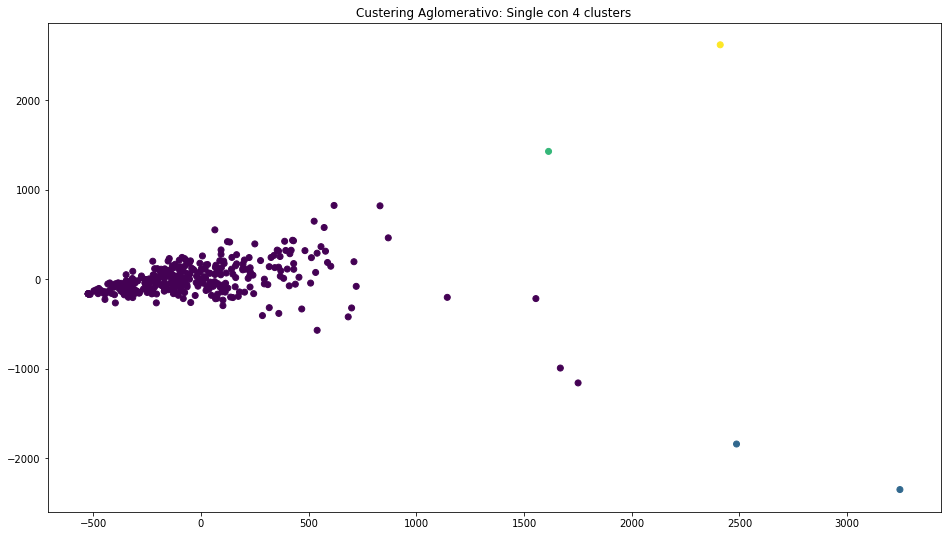

In [ ]:
# Método Single:
plt.figure(figsize=(16,9))
plt.scatter(new_X[:,0], new_X[:,1], c=AC_single.labels_)
plt.title("Custering Aglomerativo: Single con 4 clusters")
plt.show()

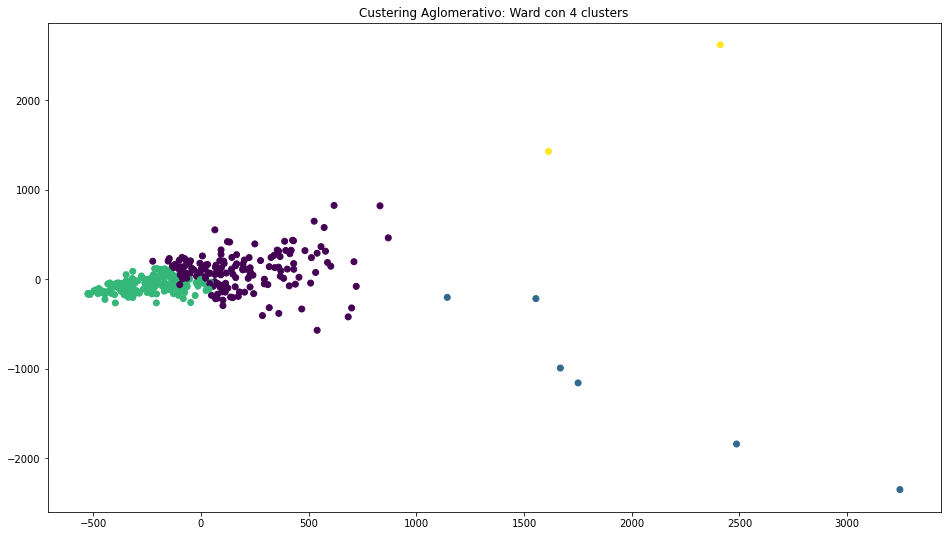

In [ ]:
# Método Ward:
plt.figure(figsize=(16,9))
plt.scatter(new_X[:,0], new_X[:,1], c=AC_ward.labels_)
plt.title("Custering Aglomerativo: Ward con 4 clusters")
plt.show()


### Problema "libre" (2.0 Puntos)

En esta sección evaluaremos su manejo a la hora de enfrentar un problema "real", para ello se les entrega la base de datos "bankloan.csv" para la cual deben realizar 2 etapas fundamentales (+1 de bonus):
1. Analisis Exploratorio de Datos: Realice un análisis exploratorio de los datos (cantidad de registros, medias, medianas, missing values, etc) y muestre al menos 2 gráficos de variables que considere relevantes para el análisis.

**Nota**: Si solo muestra resultados y no realiza un análisis relevante de estos se dará **0 ptos**.

2. Limpieza de Datos: Cree una base de datos consistente para la utilización de algoritmos de clustering. Esto significa realizar `tratamiento de valores pérdidos, tratamiento de valores anómalos, transformaciones y selección de características`. Debe claramente expresar las **features** que utilizará para hacer clustering, las cuales deben ser **al menos 3**. **Justifique** las variables escogidas apoyándose en el análisis exploratorio del punto anterior.

**Nota**: Debe justificar cada acción realizada (o no realizada, ej: decidí no imputar por x razón) sobre los datos, sino las justifica se dara **0 ptos**.

3. Aplicación de modelos de clustering: Usando la base anterior, aplique los dos modelos vistos en este laboratorio, usando el siguiente flujo de trabajo:

      a. Identifique el número de clusters óptimo para K-Means.

      b. Ejecute el código para segmentar sus datos según el número de clusters identificados.

      c. Realice un análisis descriptivo de dichos clusters. (se recomienda utilizar visualizaciones)

      d. Realice clustering jerarquico "heredando" el número de clusters anterior.

      e. Repita el analisis descriptivo para estos clusters nuevos:

4. **(BONUS)** Interpretación de resultados: Interprete los resultados obtenidos en el punto 3. Comentando cosas como: ¿Que modelo era idoneo de utilizar? y ¿Que clusters arroja el modelo? (i.e. ¿como son los clientes de cada segmento?)


####Contexto

Una institución financiera tradicional le interesa caracterizar a los clientes que han contraído un crédito con el objetivo de ofrecer productos específicos a cada grupo. Para lo anterior cuenta con los siguientes datos:

|**Variable**|**Descripción**|
|--|--|
|`CUSTOMER_ID`|identificador único del cliente|
|`AGE`|edad del cliente al contraer el crédito|
|`EDUCATION`|nivel educacional  que declara el cliente al momento de solicitar el crédito|
|`NATIONALITY`|nacionalidad del cliente|
|`YRS_WORK`|número de años trabajando e la empresa que declara el cliente al momento de solicitar el crédito|
|`YRS_ADDRESS`|número de años viviendo en la misma morada al momento de solicitar el crédito|
|`INCOME`|ingreso en miles de dólares americanos|
|`DEBT_INCOME`|deuda en consumo en miles de dólares americanos|
|`CREDIT_DEBT`| deuda en tarjetas de credito en miles de dólares americanos|
|`OTHER_DEBT`|otras deudas en miles de dólares americanos|

#### Exploración del dataset (0.5 Puntos)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Respuesta
import os
import pandas as pd
os.chdir('/content/drive/MyDrive/Universidad/8° Semestre/Data Mining/Laboratorios Data Mining')
#os.chdir('/content/sample_data')
bankloan = pd.read_csv('bankloan.csv', sep='|')
#VISUALIZAMOS LA BASE DE DATOS
bankloan

,CUSTOMER_ID,AGE,EDUCATION,NATIONALITY,YRS_WORK,YRS_ADDRESS,INCOME,DEBT_INCOME,CREDIT_DEBT,OTHER_DEBT
0,10012,28.0,Media,Chilean,7,2.0,44.0,17.7,2.99,4.80
1,10017,64.0,Postgrado,Chilean,34,17.0,116.0,14.7,5.05,12.00
2,10030,40.0,Básica,Chilean,20,12.0,61.0,4.8,1.04,1.89
3,10039,30.0,Básica,Chilean,11,3.0,27.0,34.5,1.75,7.56
4,10069,25.0,Básica,Chilean,2,2.0,30.0,22.4,0.76,5.96
...,...,...,...,...,...,...,...,...,...,...
1195,372496,24.0,Superior Completa,Chilean,1,2.0,36.0,13.0,1.00,3.68
1196,372514,72.0,Media,Chilean,48,30.0,233.0,28.8,18.25,48.85
1197,372545,51.0,Media,Chilean,9,19.0,82.0,14.6,1.50,10.48
1198,372551,57.0,Postgrado,Chilean,31,23.0,1079.0,1.4,1.96,13.14


In [ ]:
#VISUALIZAMOS LA PARTE SUPERIOR
bankloan.head()

,CUSTOMER_ID,AGE,EDUCATION,NATIONALITY,YRS_WORK,YRS_ADDRESS,INCOME,DEBT_INCOME,CREDIT_DEBT,OTHER_DEBT
0,10012,28.0,Media,Chilean,7,2.0,44.0,17.7,2.99,4.80
1,10017,64.0,Postgrado,Chilean,34,17.0,116.0,14.7,5.05,12.00
2,10030,40.0,Básica,Chilean,20,12.0,61.0,4.8,1.04,1.89
3,10039,30.0,Básica,Chilean,11,3.0,27.0,34.5,1.75,7.56
4,10069,25.0,Básica,Chilean,2,2.0,30.0,22.4,0.76,5.96


In [ ]:
#VISUALIZAMOS LA PARTE INFERIOR
bankloan.tail()

,CUSTOMER_ID,AGE,EDUCATION,NATIONALITY,YRS_WORK,YRS_ADDRESS,INCOME,DEBT_INCOME,CREDIT_DEBT,OTHER_DEBT
1195,372496,24.0,Superior Completa,Chilean,1,2.0,36.0,13.0,1.00,3.68
1196,372514,72.0,Media,Chilean,48,30.0,233.0,28.8,18.25,48.85
1197,372545,51.0,Media,Chilean,9,19.0,82.0,14.6,1.50,10.48
1198,372551,57.0,Postgrado,Chilean,31,23.0,1079.0,1.4,1.96,13.14
1199,372571,33.0,Superior Incompleta,Chilean,3,9.0,26.0,12.8,0.92,2.41


In [ ]:
#VEMOS LA FORMA DEL DATAFRAME, (INSTANCIAS,ATRIBUTOS)
bankloan.shape

(1200, 10)

In [ ]:
#VEMOS LOS ATRIBUTOS CON LOS QUE CUENTA EL DATASET
bankloan.columns

Index(['CUSTOMER_ID', 'AGE', 'EDUCATION', 'NATIONALITY', 'YRS_WORK',
       'YRS_ADDRESS', 'INCOME', 'DEBT_INCOME', 'CREDIT_DEBT', 'OTHER_DEBT'],
      dtype='object')

In [ ]:
#VEMOS LOS TIPOS DE VARIABLES
bankloan.dtypes

CUSTOMER_ID      int64
AGE            float64
EDUCATION       object
NATIONALITY     object
YRS_WORK         int64
YRS_ADDRESS    float64
INCOME         float64
DEBT_INCOME    float64
CREDIT_DEBT    float64
OTHER_DEBT     float64
dtype: object

In [ ]:
#VISUALIZAMOS LA CANTIDAD DE DATOS FALTANTES POR CADA VARIABLE
bankloan.isna().sum()

CUSTOMER_ID    0
AGE            1
EDUCATION      1
NATIONALITY    0
YRS_WORK       0
YRS_ADDRESS    1
INCOME         2
DEBT_INCOME    1
CREDIT_DEBT    0
OTHER_DEBT     0
dtype: int64

In [ ]:
#OBTENEMOS LOS VALORES ÚNICOS DE UNA VARIABLE EN PARTICULAR 1
bankloan['EDUCATION'].unique()

array(['Media', 'Postgrado', 'Básica', 'Superior Incompleta',
       'Superior Completa', nan], dtype=object)

In [ ]:
#OBTENEMOS LOS VALORES ÚNICOS DE UNA VARIABLE EN PARTICULAR 2
bankloan['NATIONALITY'].unique()

array(['Chilean'], dtype=object)

In [ ]:
#VEMOS LAS CARACTERÍSTICAS DE CADA ATRIBUTO, PRESTANDO ATENCIÓN A 
#SI APARECEN VALORES ANÓMALOS O SIN SENTIDO
print("AGE:")
print(bankloan['AGE'].describe(),"\n")
print("EDUCATION:")
print(bankloan['EDUCATION'].describe(),"\n")
print("NATIONALITY:")
print(bankloan['NATIONALITY'].describe(),"\n")
print("YRS_WORK:")
print(bankloan['YRS_WORK'].describe(),"\n")
print("YRS_ADDRESS:")
print(bankloan['YRS_ADDRESS'].describe(),"\n")
print("INCOME:")
print(bankloan['INCOME'].describe(),"\n")
print("DEBT_INCOME:")
print(bankloan['DEBT_INCOME'].describe(),"\n")
print("CREDIT_DEBT:")
print(bankloan['CREDIT_DEBT'].describe(),"\n")
print("OTHER_DEBT:")
print(bankloan['OTHER_DEBT'].describe())

AGE:
count    1199.000000
mean       35.962469
std        57.447467
min        18.000000
25%        24.000000
50%        31.000000
75%        42.000000
max      1970.000000
Name: AGE, dtype: float64 

EDUCATION:
count      1199
unique        5
top       Media
freq        429
Name: EDUCATION, dtype: object 

NATIONALITY:
count        1200
unique          1
top       Chilean
freq         1200
Name: NATIONALITY, dtype: object 

YRS_WORK:
count    1200.000000
mean        7.062500
std         9.172897
min         0.000000
25%         0.000000
50%         4.000000
75%        10.000000
max        63.000000
Name: YRS_WORK, dtype: float64 

YRS_ADDRESS:
count    1199.000000
mean        6.387823
std         6.094735
min         0.000000
25%         2.000000
50%         5.000000
75%         9.500000
max        34.000000
Name: YRS_ADDRESS, dtype: float64 

INCOME:
count    1198.000000
mean       60.000000
std        67.805486
min      -149.000000
25%        28.000000
50%        40.000000
75%      

In [ ]:
#OJO: 
#AGE HAY VALORES ANÓMALOS (EJ: AGE = 1970)
#EN NATIONALITY, TODOS LOS DATOS DISPONIBLES SON IGUALES
#INCOME: HAY VALORES ANÓMALOS (EJ: INCOME =-149)

In [ ]:
#QUERY 1 DE VERIFICACIÓN
condicion = (bankloan['AGE'] >80)
bankloan[condicion]

,CUSTOMER_ID,AGE,EDUCATION,NATIONALITY,YRS_WORK,YRS_ADDRESS,INCOME,DEBT_INCOME,CREDIT_DEBT,OTHER_DEBT
82,12149,1970.0,Media,Chilean,10,7.0,29.0,4.2,0.47,0.74


In [ ]:
#QUERY 2 DE VERIFICACIÓN
condicion = (bankloan['INCOME'] <0)
bankloan[condicion]

,CUSTOMER_ID,AGE,EDUCATION,NATIONALITY,YRS_WORK,YRS_ADDRESS,INCOME,DEBT_INCOME,CREDIT_DEBT,OTHER_DEBT
71,11860,66.0,Básica,Chilean,40,17.0,-149.0,13.1,7.79,11.73


In [ ]:
#QUERY 3 DE VERIFICACIÓN
condicion = (bankloan['YRS_WORK'] >50)
bankloan[condicion]

,CUSTOMER_ID,AGE,EDUCATION,NATIONALITY,YRS_WORK,YRS_ADDRESS,INCOME,DEBT_INCOME,CREDIT_DEBT,OTHER_DEBT
192,62867,73.0,Media,Chilean,53,25.0,410.0,4.1,3.11,13.70
234,71439,79.0,Básica,Chilean,63,18.0,497.0,8.2,15.08,25.68
620,295711,68.0,Básica,Chilean,51,26.0,274.0,7.0,8.59,10.59


In [ ]:
#GRÁFICOS

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


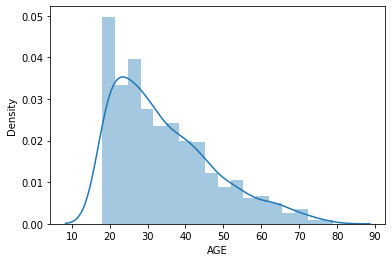

In [ ]:
#GRÁFICO DE AGE
# La edad es una variable de interés, ya que distintos grupos etarios poseen distintas necesidades y preferencias o comportamiento en general, por lo que
# se convierte en un buen insumo a la hora de decidir qué producto ofrecer a cada tipo de consumidor
sns.distplot(bankloan['AGE'][bankloan['AGE']<=100].dropna())

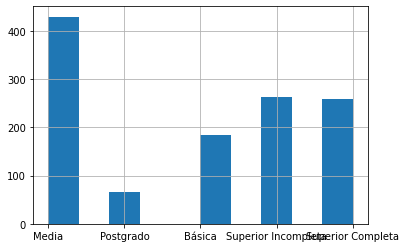

In [ ]:
#GRÁFICO DE EDUCATION
# El nivel de educación que posee una persona nos puede decir algo sobre la estabilidad en cuanto a los ingresos futuros de las personas.
bankloan['EDUCATION'].hist()
#figsize=(16,9)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


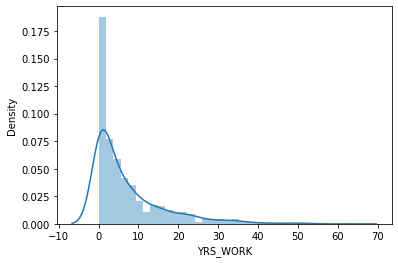

In [ ]:
#GRÁFICO DE YRS_WORK
sns.distplot(bankloan['YRS_WORK'].dropna())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


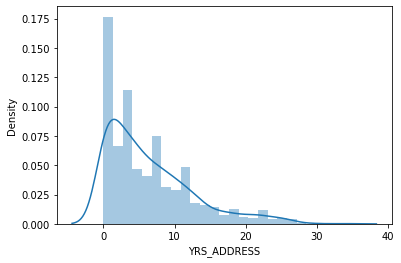

In [ ]:
#GRÁFICO DE YRS_ADDRESS
sns.distplot(bankloan['YRS_ADDRESS'].dropna())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


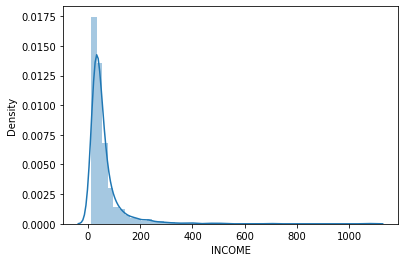

In [ ]:
#GRÁFICO DE INCOME
#Se visualiza la distribución de los ingresos de los clientes, 
#ya que esta variable es explicativa en cuanto a la descripción del tipo de clientes y permitiría una segmentación de estos mediante este atributo.
sns.distplot(bankloan['INCOME'][bankloan['INCOME']>=0].dropna())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


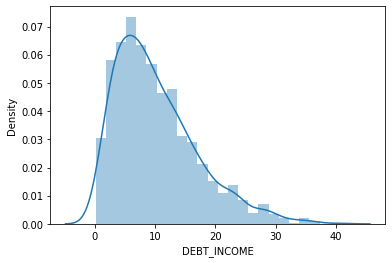

In [ ]:
#GRÁFICO DE DEBT_INCOME
#Se visualiza esta variable, y los otros tipos de deuda, por el mismo motivo de Income, ya que permite una segmentación mediante este tipo de variables.
sns.distplot(bankloan['DEBT_INCOME'].dropna())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


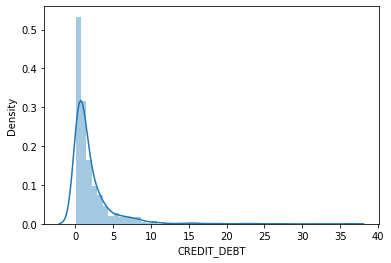

In [ ]:
#GRÁFICO DE CREDIT_DEBT
sns.distplot(bankloan['CREDIT_DEBT'].dropna())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


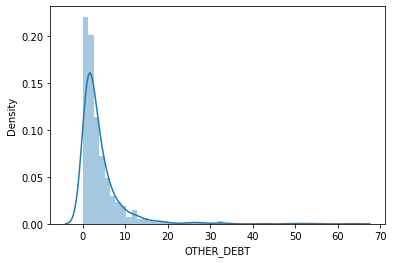

In [ ]:
#GRÁFICO DE OTHER_DEBT
sns.distplot(bankloan['OTHER_DEBT'].dropna())

In [ ]:
#RENOMBRAR COLUMNAS PARA MANEJO MÁS PRÁCTICO
bankloan2 = bankloan.copy()
bankloan2.columns = ['costumer_id', 'age', 'educ', 'nationality', 'yrs_work', 'yrs_address', 'income', 'income_debt', 'credit_debt', 'other_debt']
bankloan2.head()

,costumer_id,age,educ,nationality,yrs_work,yrs_address,income,income_debt,credit_debt,other_debt
0,10012,28.0,Media,Chilean,7,2.0,44.0,17.7,2.99,4.80
1,10017,64.0,Postgrado,Chilean,34,17.0,116.0,14.7,5.05,12.00
2,10030,40.0,Básica,Chilean,20,12.0,61.0,4.8,1.04,1.89
3,10039,30.0,Básica,Chilean,11,3.0,27.0,34.5,1.75,7.56
4,10069,25.0,Básica,Chilean,2,2.0,30.0,22.4,0.76,5.96


####Limpeza de datos (0.5 Puntos)

In [ ]:
#1°: RECORDANDO QUE:

#AGE HAY VALORES ANÓMALOS (EJ: AGE = 1970)
#INCOME: HAY VALORES ANÓMALOS (EJ: INCOME =-149)
#HAY QUE TRATAR ESTOS, AGE=1970 ES UN ERROR DE ENTRADA, 
#LA PERSONA INTRODUJO SU AÑO DE NACIMIENTO Y NO SU EDAD, POR LO QUE CAMBIAR ESTA
#POR 2021-1970= 41 SERÍA RAZONABLE
#INCOME=-149, PODRÍA DEBERSE A UN ERROR DE TIPEO, CONSIDERANDO ADEMÁS QUE 
#LA MAYOR PARTE DE LOS VALORES DE INCOME SE ENCUENTRAN EN EL RANGO [0-200]
#CAMBIAR ESTE POR EL VALOR POSITIVO SERÍA COMPRENSIBLE

In [ ]:
bank2 = bankloan2.copy()
bank2['age'][bank2['age'] ==1970] = (2021-1970)
bank2['age'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


count    1199.000000
mean       34.361968
std        13.249465
min        18.000000
25%        24.000000
50%        31.000000
75%        42.000000
max        79.000000
Name: age, dtype: float64

In [ ]:
bank2['income'][bank2['income'] == -149] = 149
bank2['income'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


count    1198.000000
mean       60.248748
std        67.584372
min        12.000000
25%        28.000000
50%        40.000000
75%        65.000000
max      1079.000000
Name: income, dtype: float64

In [ ]:
#2° RECORDAR QUE LAS VARIABLES:

#AGE (1), EDUCATION (1), YRS_ADRRESS (1), INCOME (2) Y DEBT_INCOME (1)
#PRESENTAN MISSING VALUES, POR LO QUE HAY QUE VER QUÉ HACER

#OPCIÓN 1: IMPUTAR POR VALORES RAZONABLES, MÉTODOS CON VARIABILIDAD, O MEDIANTE REGRESIÓN
#OPCIÓN 2: ELIMINAR LAS FILAS, AL SER TAN POCOS MISSING VALUES, NO AFECTARÍA MUCHO A LA BASE
#QUE CUENTA CON 1200 INSTANCIAS, SE ELIMINARÍA UN 0,5% EN EL PEOR DE LOS CASOS

In [ ]:
#OPCIÓN 2:
bank2 = bank2.dropna(how='any')

In [ ]:
# TRANSFORMACIONES

#DEUDA TOTAL DEL CLIENTE, O SEA DEBT = DEBT_INCOME + CREDIT_DEBT + OTHER_DEBT

#deuda total
def debt(d1,d2,d3):
  d=d1+d2+d3
  return d
bank2['debt'] = debt(bank2['income_debt'],bank2['credit_debt'],bank2['other_debt'])

#normalizacion
def normal(d):
  min = d.min()
  max = d.max()
  output = (d-min)/(max-min)
  return output

#RATIO DEBT/INCOME
bank2['ratio_debt'] = bank2['debt']/bank2['income']
#ORIGINALIDAD
condicion = (bank2['yrs_address'] == bank2['yrs_work'])
bank2['address_work'] = condicion*1
#NORMALIZACIONES
bank2['age_norm'] = normal(bank2['age'])
bank2['income_norm'] = normal(bank2['income'])
bank2['yrs_work_norm'] = normal(bank2['yrs_work'])
bank2['yrs_address_norm'] = normal(bank2['yrs_address'])
bank2['income_debt_norm'] = normal(bank2['income_debt'])
bank2['credit_debt_norm'] = normal(bank2['credit_debt'])
bank2['other_debt_norm'] = normal(bank2['other_debt'])
bank2['debt_norm'] = normal(bank2['debt'])
bank2['ratio_debt_norm'] = normal(bank2['ratio_debt'])


In [ ]:
bank2.head()

,costumer_id,age,educ,nationality,yrs_work,yrs_address,income,income_debt,credit_debt,other_debt,debt,ratio_debt,address_work,age_norm,income_norm,yrs_work_norm,yrs_address_norm,income_debt_norm,credit_debt_norm,other_debt_norm,debt_norm,ratio_debt_norm
0,10012,28.0,Media,Chilean,7,2.0,44.0,17.7,2.99,4.80,25.49,0.579318,0,0.163934,0.029991,0.111111,0.058824,0.433498,0.082870,0.075481,0.231394,0.273506
1,10017,64.0,Postgrado,Chilean,34,17.0,116.0,14.7,5.05,12.00,31.75,0.273707,0,0.754098,0.097470,0.539683,0.500000,0.359606,0.140156,0.188938,0.288490,0.128366
2,10030,40.0,Básica,Chilean,20,12.0,61.0,4.8,1.04,1.89,7.73,0.126721,0,0.360656,0.045923,0.317460,0.352941,0.115764,0.028643,0.029625,0.069409,0.058560
3,10039,30.0,Básica,Chilean,11,3.0,27.0,34.5,1.75,7.56,43.81,1.622593,0,0.196721,0.014058,0.174603,0.088235,0.847291,0.048387,0.118973,0.398486,0.768974
4,10069,25.0,Básica,Chilean,2,2.0,30.0,22.4,0.76,5.96,29.12,0.970667,1,0.114754,0.016870,0.031746,0.058824,0.549261,0.020857,0.093760,0.264502,0.459364


In [ ]:
#SELECCIÓN DE ATRIBUTOS:
bank = bank2.copy()
#SE ELIGEN LAS VARIABLES AGE, INCOME, DEBT, YRS_ADDRESS Y YRS_WORK (NORMALIZADAS), YA QUE ESTAS PERMITIRÍAN UNA DESCRICIÓN Y SEGMENTACIÓN DE LOS CLIENTES
#CONSIDERANDO ESTAS CARACTERÍSTICAS MÁS TÍPICAS DE CLASIFICACIÓN.
#En conjunto con las justificaciones añadidas en los gráficos de variables, se agregan las siguientes a considerar:
#yrs_address: puede entregar información sobre la estabilidad económica y personal, y alguna adversidad al riesgo.
#yrs_work: Nos puede dar indicios sobre la estabilidad en cuanto a los ingresos de la persona: si dura mucho en un trabajo, seguramente es buen trabajador

#bank = bank[['age_norm','income_norm','income_debt_norm','credit_debt_norm','other_debt_norm','debt_norm','yrs_address_norm','yrs_work_norm']]
bank = bank[['age_norm','income_norm','income_debt_norm','credit_debt_norm','other_debt_norm']]
#bank = bank[['age_norm','income_debt_norm','credit_debt_norm','other_debt_norm','yrs_address_norm']]
bank.head()

,age_norm,income_norm,income_debt_norm,credit_debt_norm,other_debt_norm
0,0.163934,0.029991,0.433498,0.082870,0.075481
1,0.754098,0.097470,0.359606,0.140156,0.188938
2,0.360656,0.045923,0.115764,0.028643,0.029625
3,0.196721,0.014058,0.847291,0.048387,0.118973
4,0.114754,0.016870,0.549261,0.020857,0.093760


#### Aplicar modelos de clustering (1.0 Puntos)

In [ ]:
#KMEANS
from sklearn.cluster import KMeans    #importar método para hacer KMeans
import matplotlib.pyplot as plt       #para graficar
import numpy as np                    #numpy para manejo de arreglos

# Plotly library
import plotly.express as px           #librerias necesarias para usar plotly
import plotly.graph_objects as go
import plotly.figure_factory as ff

random_state = 20                     #Se fija aletoreidad necesaria

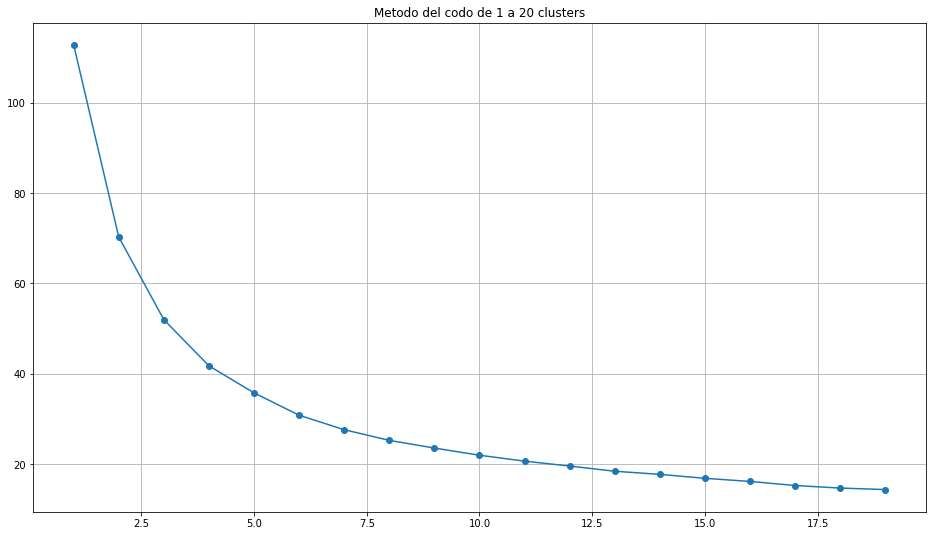

In [ ]:
sse = []

clusters = list(range(1, 20))
for k in clusters:
    kmeans = KMeans(n_clusters=k).fit(bank)
    sse.append(kmeans.inertia_)
plt.figure(figsize=(16,9))
plt.plot(clusters, sse, marker="o")
plt.title("Metodo del codo de 1 a 20 clusters")
plt.grid(True)
plt.show()

In [ ]:
#CON EL MÉTODO DEL CODO, SE IDENTIFICA UN "CODO" EN 4 CLUSTERS, YA QUE ESISTE UN CAMBIO CONSIDERABLE EN LA PENDIENTE DE LA RECTA.
#NOTANDO QUE LAS GANANCIAS EN TÉRMINOS DE SSE POR UN CLUSTER MÁS(5), ES MENOR EN COMPARACIÓN A 4.

In [ ]:
#UTILIZAMOS KMEANS CON 4 CLUSTERS
kmeans = KMeans(n_clusters=4, n_init=100, max_iter=500, random_state=random_state)
kmeans.fit(bank)
#GUARDAMOS LAS PREDICCIONES
y_pred = kmeans.predict(bank)                                                        

In [ ]:
#CREAMOS UNA COPIA DE BANK, DÓNDE GUARDAREMOS LAS ETIQUETAS DEL CLUSTERING
bank_clust=bank.copy()
bank_clust['labels_kmeans'] = kmeans.labels_

In [ ]:
#DIVIDIMOS EL DATASET, PARA LUEGO REDUCIR LA DIMENSIONALIDAD Y PODER VISUALIZAR EN 2D LOS CLUSTERS FORMADOS
x=bank_clust.iloc[:,0:5].values
y=bank_clust.iloc[:,5].values
y

array([0, 2, 3, ..., 2, 2, 1], dtype=int32)

In [ ]:
from sklearn.decomposition import PCA
#CREAR EL OBJETO PCA
pca = PCA(n_components=2)
#AJUSTARLO A LOS DATOS
principalComponents = pca.fit_transform(x)

#DATAFRAME CON LAS PC
df_pca = pd.DataFrame(data = principalComponents, columns = ['c1', 'c2'])
#INCLUIMOS LAS ETIQUETAS DE KMEANS
df_pca['labels_kmeans']=y

df_pca.head()

,c1,c2,labels_kmeans
0,-0.059372,0.205045,0
1,0.521640,0.017771,2
2,0.049836,-0.159297,3
3,0.042873,0.578247,0
4,-0.094842,0.315804,0


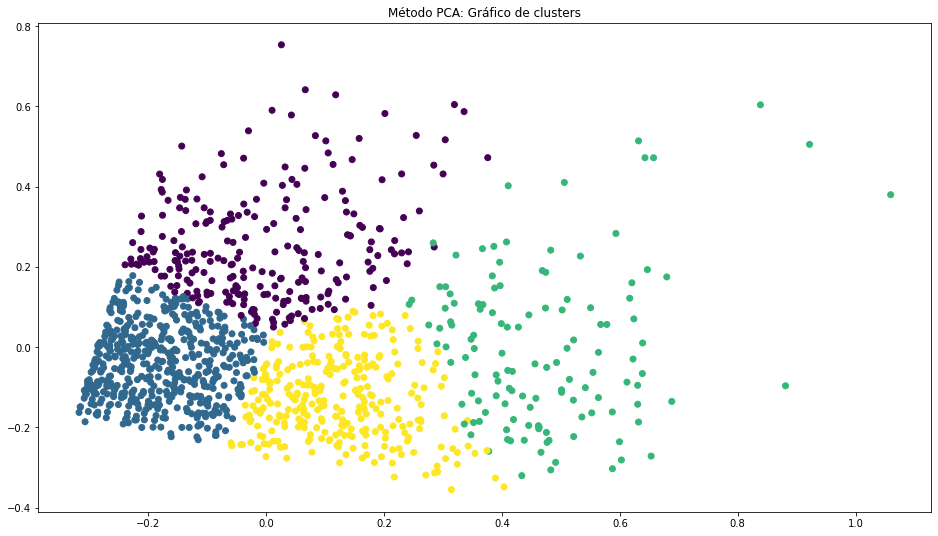

In [ ]:
#GRAFICAMOS EN 2D
plt.figure(figsize=(16,9))
plt.scatter(df_pca['c1'], df_pca['c2'],c=kmeans.labels_)
plt.title("Método PCA: Gráfico de clusters")
plt.show()

In [ ]:
#TRAS APLICAR EL MÉTODO DE CLUSTERING KMEANS A LA BASE DE DATOS, SE LLEVARON LOS RESULTADOS A UN DATAFRAME DE DIMENSIONALIDAD 2 PARA PODER VISUALIZAR
#LOS GRUPOS OBTENIDOS, EN DÓNDE POR EL MÉTODO DE PCA, SÓLO ES POSIBLE DECIR QUE SE ENCONTRARON 4 CATEGORÍAS DE CLIENTES AGRUPADOS POR SIMILITUDES EN
#EDAD, INGRESOS, DEUDA POR CONSUMO, DEUDA POR CRÉDITO Y OTRAS DEUDAS.

In [ ]:
#CLUSTERING AGLOMERATIVO JERÁRQUICO
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage

In [ ]:
#4 MODELOS DE CLUSTERING JERÁRQUICO
complete = linkage(x, method="complete", metric="euclidean", optimal_ordering=False)
single = linkage(x, method="single", metric="euclidean", optimal_ordering=False)
average = linkage(x, method="average", metric="euclidean", optimal_ordering=False)
ward = linkage(x, method="ward", metric="euclidean", optimal_ordering= False)

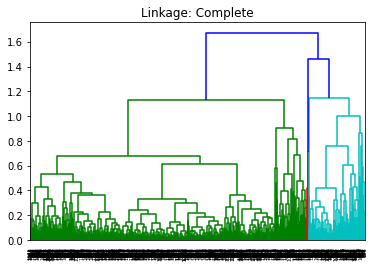

In [ ]:
#COMPLETE
dendrogram(complete)
plt.title("Linkage: Complete")
plt.show()

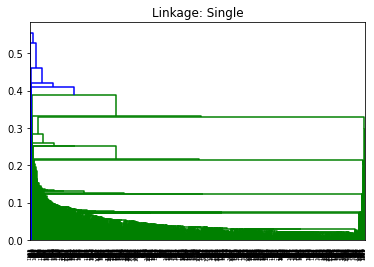

In [ ]:
#SINGLE
dendrogram(single)
plt.title("Linkage: Single")
plt.show()

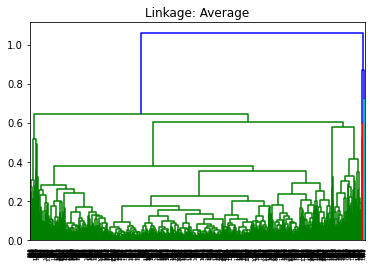

In [ ]:
#AVERAGE
dendrogram(average)
plt.title("Linkage: Average")
plt.show()

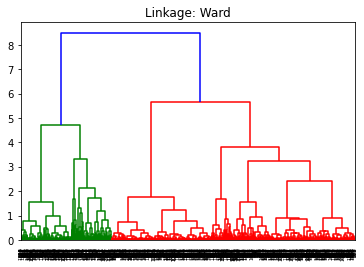

In [ ]:
#WARD
dendrogram(ward)
plt.title("Linkage: Ward")
plt.show()

In [ ]:
#POR VISUALIZACIÓN, SE PREFIERE UTILIZAR WARD PARA APLICAR EL CLUSTERING CON EL TOTAL DE 4 CLUSTERS QUE SE DECIDIERON CON KMEANS
ac = AgglomerativeClustering(n_clusters=4,
                             linkage="ward",
                             distance_threshold=None)
ac.fit(x)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4)

In [ ]:
#SE AGREGAN LAS ETIQUETAS DEL CLUSTERING JERÁRQUICO ALGOMERATIVO
bank_clust['labels_aglo'] = ac.labels_
#DE IGUAL FORMA AL MODELO REDUCIDO EN 2D PARA GRAFICAR Y VER COMPARACIONES
df_pca['labels_aglo']=ac.labels_

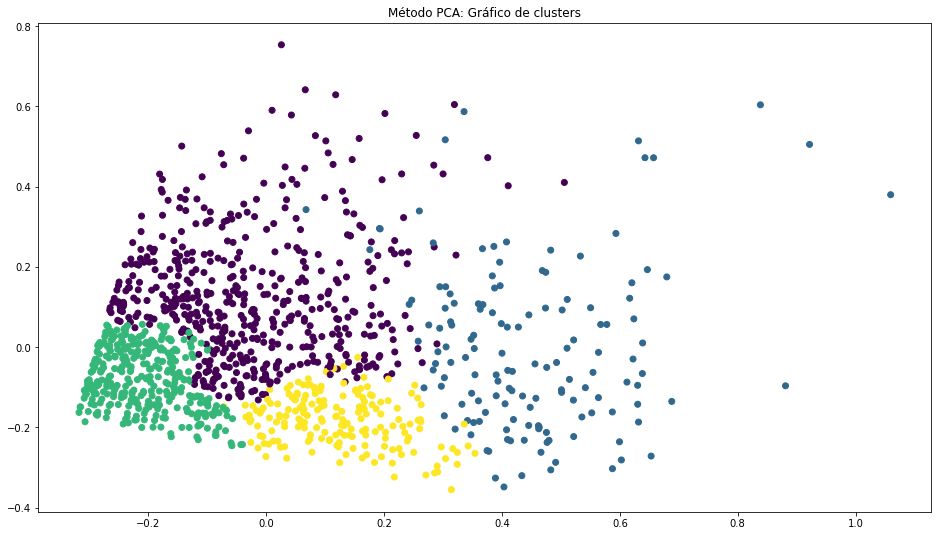

In [ ]:
import matplotlib.pyplot as plt 
#GRAFICAMOS CON LAS ETIQUETAS DEL CLUSTERING JERÁRQUICO
plt.figure(figsize=(16,9))
plt.scatter(df_pca['c1'], df_pca['c2'],c=ac.labels_)
plt.title("Método PCA: Gráfico de clusters")
plt.show()

In [ ]:
#NOTAMOS QUE HAY UNA SIMILITUD EN CUANTO A LA UBICACIÓN DE LOS CLUSTERS ENCONTRADOS, DESTACANDO ADEMÁS UN MAYOR SOLAPAMIENTO DE LOS CLUSTERS QUE SE VISUALIZA EN 
#ESTE ÚLTIMO GRÁFICO, PERO SE CONCLUYE DE IGUAL MANERA QUE CON KMEANS QUE SE ENCONTRARON 4 CLUSTERS DE CLIENTES AGRUPADOS POR LOS MISMOS ATRIBUTOS Y QUE COMPARTEN 
#SIMILITUDES EN ESTAS.

In [ ]:
#VERIFICACIÓN DE SOLAPAMIENTO
from sklearn.metrics import silhouette_score
print("Dataset X K-Means\t", silhouette_score(x, kmeans.labels_))
print("Dataset X Ward Agg\t", silhouette_score(x, ac.labels_))

Dataset X K-Means	 0.36126953643482046
Dataset X Ward Agg	 0.25650354434457234


In [ ]:
bankloan2=bank2.copy()
bankloan2['labels_kmeans']=bank_clust['labels_kmeans']
bankloan2['labels_aglo']=bank_clust['labels_aglo']
bankloan2

,costumer_id,age,educ,nationality,yrs_work,yrs_address,income,income_debt,credit_debt,other_debt,debt,ratio_debt,address_work,age_norm,income_norm,yrs_work_norm,yrs_address_norm,income_debt_norm,credit_debt_norm,other_debt_norm,debt_norm,ratio_debt_norm,labels_kmeans,labels_aglo
0,10012,28.0,Media,Chilean,7,2.0,44.0,17.7,2.99,4.80,25.49,0.579318,0,0.163934,0.029991,0.111111,0.058824,0.433498,0.082870,0.075481,0.231394,0.273506,0,0
1,10017,64.0,Postgrado,Chilean,34,17.0,116.0,14.7,5.05,12.00,31.75,0.273707,0,0.754098,0.097470,0.539683,0.500000,0.359606,0.140156,0.188938,0.288490,0.128366,2,1
2,10030,40.0,Básica,Chilean,20,12.0,61.0,4.8,1.04,1.89,7.73,0.126721,0,0.360656,0.045923,0.317460,0.352941,0.115764,0.028643,0.029625,0.069409,0.058560,3,3
3,10039,30.0,Básica,Chilean,11,3.0,27.0,34.5,1.75,7.56,43.81,1.622593,0,0.196721,0.014058,0.174603,0.088235,0.847291,0.048387,0.118973,0.398486,0.768974,0,0
4,10069,25.0,Básica,Chilean,2,2.0,30.0,22.4,0.76,5.96,29.12,0.970667,1,0.114754,0.016870,0.031746,0.058824,0.549261,0.020857,0.093760,0.264502,0.459364,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,372496,24.0,Superior Completa,Chilean,1,2.0,36.0,13.0,1.00,3.68,17.68,0.491111,0,0.098361,0.022493,0.015873,0.058824,0.317734,0.027531,0.057832,0.160161,0.231615,1,0
1196,372514,72.0,Media,Chilean,48,30.0,233.0,28.8,18.25,48.85,95.90,0.411588,0,0.885246,0.207123,0.761905,0.882353,0.706897,0.507230,0.769619,0.873586,0.193848,2,1
1197,372545,51.0,Media,Chilean,9,19.0,82.0,14.6,1.50,10.48,26.58,0.324146,0,0.540984,0.065604,0.142857,0.558824,0.357143,0.041435,0.164986,0.241335,0.152321,2,1
1198,372551,57.0,Postgrado,Chilean,31,23.0,1079.0,1.4,1.96,13.14,16.50,0.015292,0,0.639344,1.000000,0.492063,0.676471,0.032020,0.054227,0.206902,0.149398,0.005641,2,1


**Bonus**
#### Interpretar resultados (1.0 Puntos)

In [ ]:
bankloan2.groupby(by='labels_kmeans').mean()

,costumer_id,age,yrs_work,yrs_address,income,income_debt,credit_debt,other_debt,debt,ratio_debt,address_work,age_norm,income_norm,yrs_work_norm,yrs_address_norm,income_debt_norm,credit_debt_norm,other_debt_norm,debt_norm,ratio_debt_norm,labels_aglo
labels_kmeans,,,,,,,,,,,,,,,,,,,,,
0,231133.909091,30.380165,4.880165,4.454545,48.318182,19.904132,3.169835,6.377934,29.451901,0.740930,0.190083,0.202954,0.034038,0.077463,0.131016,0.487787,0.087871,0.100346,0.267529,0.350258,0.028926
1,227782.088847,24.705104,2.158790,2.366730,34.720227,7.097353,0.802268,1.625917,9.525539,0.321206,0.319471,0.109920,0.021294,0.034267,0.069610,0.172349,0.022032,0.025464,0.085786,0.150925,1.332703
2,219282.472441,60.456693,22.811024,17.409449,156.401575,13.024409,5.736614,11.834882,30.595906,0.297791,0.023622,0.696011,0.135334,0.362080,0.512043,0.318335,0.159250,0.186336,0.277963,0.139804,0.984252
3,206603.631757,43.716216,10.847973,10.425676,74.375000,6.625338,1.603784,3.073547,11.302669,0.193614,0.047297,0.421577,0.058458,0.172190,0.306638,0.160723,0.044321,0.048275,0.101994,0.090329,1.905405


**Respuesta:**\
Tras realizar el clsutering a la base de datos, se encontró que:

*   **Cluster 1** (label 1): corresponde a los clientes de menor edad, con menor experiencia laboral y menores ingresos, con una deuda total menor, pero que presentan un ratio de deuda (deuda total/ingresos) mayor que el cluster 2.
*   **Cluster 2** (label 0): este grupo de clientes, se encuentra en promedio en los 30 años, y cuentan con una experiencia laboral mayor al grupo anterior, al igual que sus ingresos, pero mantienen una deuda total total casi tan alta como el grupo de mayor edad, hecho que se traduce en que son el grupo con un mayor ratio de deuda.
*   **Cluster 3** (label 3): corresponde al grupo de clientes que rondan los 40 años, cuya experiencia labroal duplica a la del grupo anterior, y en promedio, ganan 25 mil dolares más que el segundo grupo, por otro lado sus deudas totales son menores que este segundo grupo y su ratio de deuda es el menor etre los 4 clusters.
*   **Cluster 4** (label 4): este grupo es el de mayor edad y por cosiguiente una mayor experiencia laboral, sus ingresos promedio rondan los 150 mil dólares, pero son el grupo con mayor deuda total, no así, debido a sus ingresos, el ratio de deuda es el 2do menor entre los cuatro clusters encontrados.

Se concluye que del clustering, se encontraron grupos que mantienen relación lógica entre sus características y atributos, y que caracterizan de buena manera sus similitudes y diferencias con los otros grupos.

